In [1]:
import os
import random
import numpy as np
import rasterio
from rasterio.windows import Window
import spectral
import rasterio
import matplotlib.pyplot as plt

In [3]:
def create_random_cubes(hsi_image, num_cubes, cube_size=200):
    
    cubes = []
    height, width = hsi_image.height, hsi_image.width
    num_bands = hsi_image.count

    cube_height = cube_size
    cube_width = cube_size

    for _ in range(num_cubes):

        top = random.randint(0, height - cube_height)
        left = random.randint(0, width - cube_width)

        # Extract the cube from the image
        window = Window(left, top, cube_width, cube_height)
        cube_data = hsi_image.read(window=window)
        cubes.append(cube_data)
    
    return cubes




def save_cube(cube, output_path, profile):
    
    height, width = cube.shape[1], cube.shape[2]
    
    profile.update(height=height, width=width, interleave='BIL')
    
    if not output_path.endswith('.bil'):
        
        output_path = output_path.replace('.hdr', '.bil')
    
    
    with rasterio.open(output_path, 'w', **profile) as dst:
        
        dst.write(cube)
        
    hdr_path = output_path.replace('.bil', '.bil.hdr')
    os.rename(output_path.replace('.bil', '.hdr'), hdr_path)
    
    
    
def process_hsi_file(file_path, output_dir, num_cubes):
    
    # Read the .bil image
    with rasterio.open(file_path) as hsi_image:
        
        # Extract random cubes
        cubes = create_random_cubes(hsi_image, num_cubes=num_cubes)

        profile = hsi_image.profile
        profile.update(driver='ENVI')

        # Save each cube
        base_filename = os.path.basename(file_path).replace('.bil', '')
        
        for i, cube in enumerate(cubes):
            
            output_cube_path = os.path.join(output_dir, f"{base_filename}_cube_{i+1}.bil")
            save_cube(cube, output_cube_path, profile)



def process_folder_structure(input_dir, output_dir, num_cubes):
    
    for root, _, files in os.walk(input_dir):
        
        for file in files:
            
            if file.endswith('.bil'):
                
                input_file_path = os.path.join(root, file)

                relative_path = os.path.relpath(root, input_dir)
                output_subdir = os.path.join(output_dir, relative_path)
                
                os.makedirs(output_subdir, exist_ok=True)

                # Process the file
                process_hsi_file(input_file_path, output_subdir, num_cubes=num_cubes)


num_cubes = 15

input_directory = 'C:/Users/rafin/Desktop/NSU/NSU 12th Semester/CSE499A.22/Project/Datasets/Apple_Datasets/Apple_BIL/Apple_BIL_Masked'
output_directory = 'C:/Users/rafin/Desktop/NSU/NSU 12th Semester/CSE499A.22/Project/Datasets/Apple_Datasets/Apple_BIL/Apple_BIL_Cubes'

process_folder_structure(input_directory, output_directory, num_cubes)

c:\Users\rafin\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
c:\Users\rafin\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


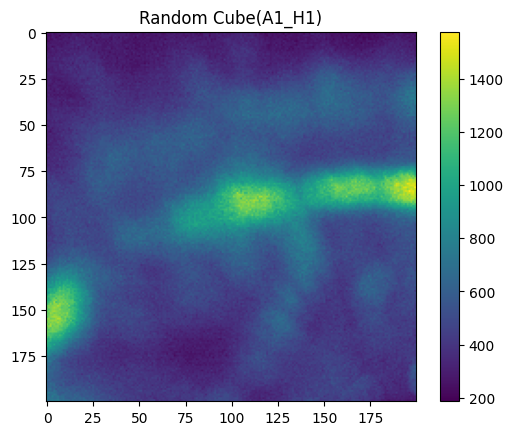

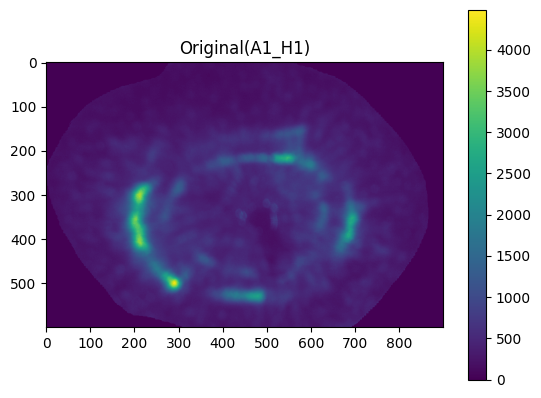

In [3]:
#visualize
hsi_data = 'C:/Users/rafin/Desktop/NSU/NSU 12th Semester/CSE499A.22/Project/Datasets/Apple_Datasets/Apple_BIL/Apple_BIL_Cubes/Fungicide_Apple/DIB_AppleNativohigh/A1_H1_cube_1.bil'

# Open the BIL file using Rasterio
with rasterio.open(hsi_data) as dataset:
    
    # Read a band (for visualization purposes)
    band1 = dataset.read(30)
    
    # Visualize the first band
    plt.imshow(band1)
    plt.colorbar()
    plt.title('Random Cube(A1_H1)')
    plt.show()
    

hsi_data = 'C:/Users/rafin/Desktop/NSU/NSU 12th Semester/CSE499A.22/Project/Datasets/Apple_Datasets/Apple_BIL/Apple_BIL_Masked/Fungicide_Apple/DIB_AppleNativohigh/A1_H1.bil'

# Open the BIL file using Rasterio
with rasterio.open(hsi_data) as dataset:
    
    band = dataset.read(30)
    
    # Visualize the first band
    plt.imshow(band)
    plt.colorbar()
    plt.title('Original(A1_H1)')
    plt.show()